# Datan analysointi K2020_2 - Tehtävät kerta 6

Palauta Optiman palautuslaatikkoon viimeistään su 29.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi: Antti Teppo M1467

## 1. Sekunnit aikaleimoiksi
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt on gps-koordinaatteja ja niille aikaleimoja:

**t401.444483900_1490796_6272051_S36.**

  * **t401** = laitteen id (merkkijono)
  * **444483900** = UTC-aika sekunteina vuoden 2006 alusta eli 1.1.2006 00:00:00 (kokonaislukuna)
  * **1490796** = pituusaste*50000 (kokonaislukuna)
  * **6272051** = leveysaste*100000 (kokonaislukuna)
  * **S36** = nopeus (km/h) * 10 (kokonaislukuna)
  
laiteid:n jälkeen siis on aina piste ja muissa väleissä alaviiva. Nopeuslukeman edessä on aina kirjain S ja rivin lopussa piste.

Pura tiedosto DataFrameen, jossa on sarakkeet
  * laitteen id
  * aikaleima Timestampina Suomen aikaa joka on tuolloin ollut 2 tuntia edessä UTC-aikaa
  * pituusaste asteina
  * leveysaste asteina
  * nopeus km/h
  
Mallia alusta:
![malli1](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli1.png)

In [9]:
import pandas as pd
from datetime import timedelta, datetime

alku = datetime(2006,1,1,4) #aikaa lisätty 4 tuntia, koska molemmissa ajoissa on 2 tunnin heitto! Olisiko pitänyt tehdä jotenkin hienommin?
sekunnit = alku.timestamp()
print(alku)
print(sekunnit)

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt', names=['all'])
df['id'] = df['all'].str.split('.').str.get(0)#.strftime('%Y-%M-%d %H:%M:%S') + alku
df['aika'] = df['all'].str.split('.').str.get(1).str.split('_').str.get(0).astype(int)
df['aika'] = df['aika'] + sekunnit
df['pituusaste'] = df['all'].str.split('_').str.get(1).str.split('_').str.get(0).astype(int)/50000
df['leveysaste'] = df['all'].str.split('_').str.get(2).str.split('_').str.get(0).astype(int)/100000
df['nopeus km/h'] = df['all'].str.split('S').str.get(1).str.split('.').str.get(0).astype(int)/10
df.drop('all', axis=1, inplace=True)
#df['aika'] = datetime.fromtimestamp(df['aika']).strftime('%Y-%M-%d %H:%M:%S')
#df['aika3'] = pd.to_timedelta(df['aika'], unit='s')
df['aika'] = pd.to_datetime(df['aika'], unit='s')
df.head()


2006-01-01 04:00:00
1136080800.0


,id,aika,pituusaste,leveysaste,nopeus km/h
0,t401,2020-02-01 13:45:00,29.81592,62.72051,3.6
1,t401,2020-02-01 13:45:02,29.81584,62.72052,7.6
2,t401,2020-02-01 13:45:04,29.81580,62.72054,5.4
3,t401,2020-02-01 13:45:06,29.81580,62.72054,0.0
4,t401,2020-02-01 13:45:08,29.81580,62.72054,0.0


## 2. Jalkapalloa

Lue tiedosto http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt , jossa on Valioliigan ottelut kaudesta 1993-1994 tammikuuhun 2020 DataFrameen.

Listaa ensin minä kalenterikuukausina on pelattu eniten otteluita.  
Pitäisi tulla:
```
2017-12    69
2018-12    69
1994-04    68
2001-12    65
2013-12    64
1994-12    64
2006-12    64
```


Selvitä sitten minä **kalenteriviikkoina (ma-su)** on pelattu eniten otteluita.
Yritä saada otsikoitua viikot alkamispäivän mukaan, jolloin tulokseksi pitäisi saada:  
```
1994-12-26    31  
2005-12-26    27  
1993-12-27    27  
1993-08-16    22  
1993-08-23    22  
```
(huomioi että vuodenvaihteessa saman kalenteriviikon päivät ovat usein eri vuosina)

Laske vielä kuinka paljon otteluita on pelattu eri viikonpäivinä:  
```
ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
```

In [10]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt', sep=';')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace=True)
print(df.head())
print('\nOtteluiden määrä kuukausittain:\n')
print(df.resample('M', kind='period').size().sort_values(ascending=False).head(6)) #otteluiden määrä kuukausittain 
print('\nOtteluiden määrä kalenteriviikoittain:\n')
print(df.resample('W-SUN', label='left', loffset='+1d').size().sort_values(ascending=False).head(10)) #otteluiden määrä viikoittain
print('*********************************\n')
print('\nOtteluiden määrä viikonpäivittäin:\n')
df['weekday'] = df['Date'].dt.strftime('%A')#weekday
print(df.groupby('weekday').size())
print('*********************************\n')

               season       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR
Date                                                                         
1993-08-14  1993-1994 1993-08-14      Arsenal        Coventry     0     3   A
1993-08-14  1993-1994 1993-08-14  Aston Villa             QPR     4     1   H
1993-08-14  1993-1994 1993-08-14      Chelsea       Blackburn     1     2   A
1993-08-14  1993-1994 1993-08-14    Liverpool  Sheffield Weds     2     0   H
1993-08-14  1993-1994 1993-08-14     Man City           Leeds     1     1   D

Otteluiden määrä kuukausittain:

Date
2018-12    69
2017-12    69
1994-04    68
2001-12    65
2006-12    64
1994-12    64
Freq: M, dtype: int64

Otteluiden määrä kalenteriviikoittain:

Date
1994-12-26    31
1993-12-27    27
2005-12-26    27
1993-08-16    22
1993-08-23    22
2010-12-27    21
2002-12-23    21
1994-08-22    21
2013-12-23    21
2003-12-22    20
dtype: int64
*********************************


Otteluiden määrä viikonpäivittäin:

weekday


# 3. Liigavire
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt on SM-liigan (nyk. Liiga) runkosarjan ottelutukset kaudesta 2010-2011 kauden 2019-2020 maaliskuun alkuun.

huom. -sarakkeessa on merkintä JA tai VL, jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa.

Voittanut (enemmän maaleja tehnyt joukkue) saa 3 pistettä ja hävinnyt 0 pistettä, paitsi jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa, voittanut joukkue saa 2 pistettä ja hävinnyt yhden pisteen.


Laske jokaisen JYP:n ottelun kohdalle paljonko JYP on saanut pisteitä edellisestä 15 ottelustaan ja piirrä näistä tiedoista piste-viivakaavio, jossa vaaka-akselilla on ottelun päiväys.

(kaavioon tulee siis n. 6 kk katkoja kausien välillä koska runkosarjaotteluia ei pelata huhti-elokuussa)

Malli:
![malli3](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli3.png)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

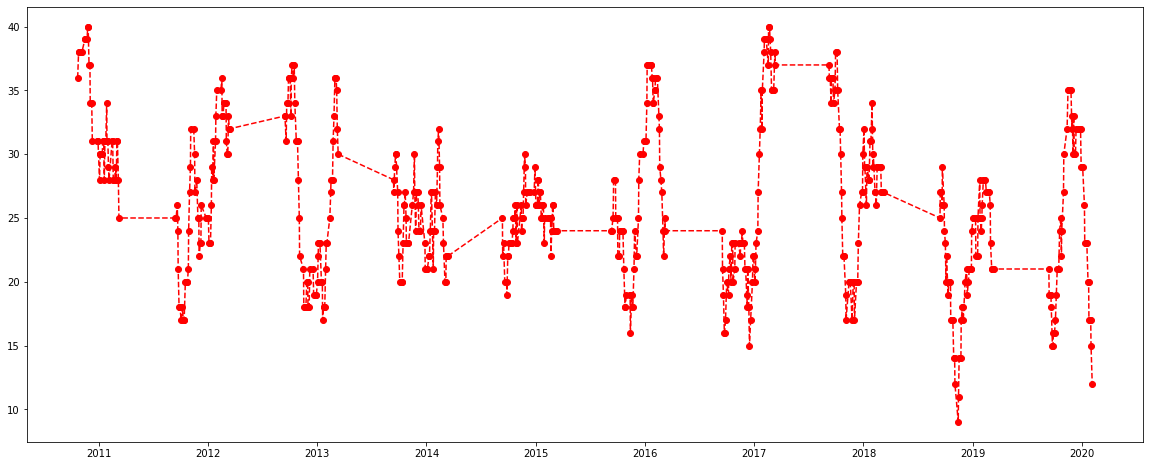

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt')
#kopioin vanhasta tehtävän mallista pistelaskun

df['kotij'] = df['ottelu'].str.split('-').str[0]  
df['vierasj'] = df['ottelu'].str.split('-').str[1]
df['kotim'] = df['tulos'].str.split('-').str[0].astype(int)
df['vierasm'] = df['tulos'].str.split('-').str[1].astype(int)

# alustetaan pisteet nolliksi

df['kotipist'] = 0
df['vieraspist'] = 0

# varsinaisella peliajalla voitosta 3 pistettä
df.loc[(df['huom'].isnull()) & (df['kotim']>df['vierasm']), 'kotipist'] = 3
df.loc[(df['huom'].isnull()) & (df['kotim']<df['vierasm']), 'vieraspist'] = 3

# JA/VL - peleissä pisteet 2-1
df.loc[(df['huom'].notnull()) & (df['kotim']>df['vierasm']), 'kotipist'] = 2
df.loc[(df['huom'].notnull()) & (df['kotim']<df['vierasm']), 'kotipist'] = 1
df.loc[(df['huom'].notnull()) & (df['kotim']>df['vierasm']), 'vieraspist'] = 1
df.loc[(df['huom'].notnull()) & (df['kotim']<df['vierasm']), 'vieraspist'] = 2

#luodaan Jypille oma dataframe
dfJyp = df.loc[(df['kotij'] == 'JYP') | (df['vierasj'] == 'JYP')]

#luodaan sarake jonne kaikki Jypin pisteet otteluittain ja sen alustus ensin nollaksi
dfJyp['JYP_pisteet'] = 0
dfJyp.loc[(dfJyp['kotij'] == 'JYP'), 'JYP_pisteet'] = dfJyp['kotipist']
dfJyp.loc[(dfJyp['vierasj'] == 'JYP'), 'JYP_pisteet'] = dfJyp['vieraspist']

#lasketaan 15:sta edellistä peliä yhteen ja siitä oma sarake
dfJyp['15_edel_pelin_pisteet'] = dfJyp['JYP_pisteet'].rolling(15).sum()

#muokataan 'pvm'-sarake datetime muotoon ja huomiodaan, että päivät muuntuu oikein
dfJyp['pvm'] = pd.to_datetime(dfJyp['pvm'], dayfirst=True )
#siirretään datetime indeksiksi
dfJyp.set_index('pvm', inplace=True)
#print(dfJyp[50:70]) varmmistus, että laskuri toimii oikein
#luodaan kaavio
plt.figure()
plt.plot(dfJyp['15_edel_pelin_pisteet'], 'ro--') #hyödynnetään indeksiä jolloin ei tarvira kuin y-akselille haluttu sarake
fig = plt.gcf()
fig.set_size_inches(20,8) #muokataan kaavion kokoa
plt.show()

## 4. Kilometrit

Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt  on erään kuntoilijan päivittäisiä kilometrimääriä kesiltä 2015-2019.

Lue tiedosto ja laske jokaiselle päivälle toukokuun alusta lokakuun loppuun kuinka paljon enemmän tai vähemmän vuonna 2019 on kertynyt kilometreja kesän alusta verrattuna vuosiin 2015... 2018. Piirrä samaan kaavioon ero jokaiseen aikaisempaan vuoteen.

(huomaa että kilometrejä ei ole kertynyt läheskään jokainen päivä, mutta joka päivälle pitäisi saada ero laskettua)

Malli:
![malli4](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli4.png)

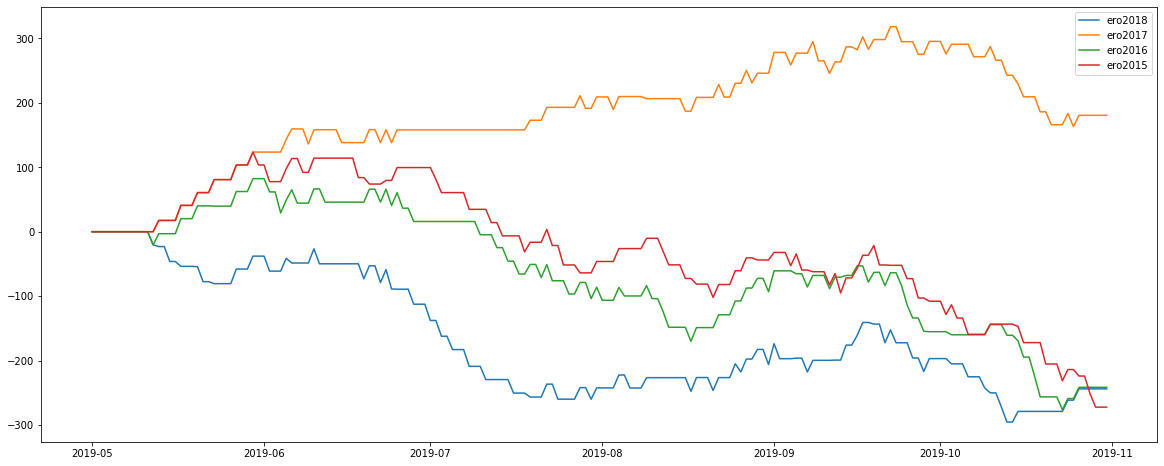

In [61]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt', 
                 parse_dates=['pvm'], 
                 dayfirst=True, 
                 index_col='pvm')

#alkupeäriset tiedot vuodelta 2019, toimii koska pvm sarake on datetime muodossa
df2019A = df['2019']

#luodaan haluttu aikaväli
days2019 = pd.date_range('2019-05-01', '2019-10-31') 

#luodaan aikavälistä uusi dataframe ja otetaan sinne alkuperäiset kilometrit ja muokataan NaN arvot nolliksi
df2019F = days2019.to_frame()
df2019F['km'] = df2019A['km']
df2019F['km'].fillna(0, inplace=True)
df2019F.drop(0, axis=1, inplace=True) #poistetaan turha päivämärää sarake
df2019F['yht'] = df2019F['km'].cumsum() #lasketaan kilsat alusta alkaen yhteen
df2019F.reset_index(inplace=True) #nollataan indeksi jotta seuraavien vuosien taulussa on sama indeksi laskuja varten
#print(df2019F.head())

#toistetaan samat toimet kaikille vuosille, kenties olisin voinut hyödyntää Period toimintoa mutta en saanut sen avulla toimimaan
df2018A = df['2018']
days2018 = pd.date_range('2018-05-01', '2018-10-31')
df2018F = days2018.to_frame()
df2018F['km'] = df2018A['km']
df2018F['km'].fillna(0, inplace=True)
df2018F.drop(0, axis=1, inplace=True)
df2018F['yht'] = df2018F['km'].cumsum()
df2018F.reset_index(inplace=True)
df2018F['erotus'] = df2019F['yht'] - df2018F['yht']
#print(df2018F.head())

df2017A = df['2017']
days2017 = pd.date_range('2017-05-01', '2017-10-31')
df2017F = days2017.to_frame()
df2017F['km'] = df2017A['km']
df2017F['km'].fillna(0, inplace=True)
df2017F.drop(0, axis=1, inplace=True)
df2017F['yht'] = df2017F['km'].cumsum()
df2017F.reset_index(inplace=True)
df2017F['erotus'] = df2019F['yht'] - df2017F['yht']
#print(df2017F.head())

df2016A = df['2016']
days2016 = pd.date_range('2016-05-01', '2016-10-31')
df2016F = days2016.to_frame()
df2016F['km'] = df2016A['km']
df2016F['km'].fillna(0, inplace=True)
df2016F.drop(0, axis=1, inplace=True)
df2016F['yht'] = df2016F['km'].cumsum()
df2016F.reset_index(inplace=True)
df2016F['erotus'] = df2019F['yht'] - df2016F['yht']
#print(df2016F.head())

df2015A = df['2015']
days2015 = pd.date_range('2015-05-01', '2015-10-31')
df2015F = days2015.to_frame()
df2015F['km'] = df2015A['km']
df2015F['km'].fillna(0, inplace=True)
df2015F.drop(0, axis=1, inplace=True)
df2015F['yht'] = df2015F['km'].cumsum()
df2015F.reset_index(inplace=True)
df2015F['erotus'] = df2019F['yht'] - df2015F['yht']
#print(df2015F.head())

#luodaan tiedoista kaavio
plt.figure()
plt.plot(df2019F['index'], df2018F['erotus'], label='ero2018')
plt.plot(df2019F['index'], df2017F['erotus'], label='ero2017')
plt.plot(df2019F['index'], df2016F['erotus'], label='ero2016')
plt.plot(df2019F['index'], df2015F['erotus'], label='ero2015')
fig = plt.gcf()
fig.set_size_inches(20,8) #muokataan kaavion kokoa
plt.legend()
plt.show()


## 5. access.log
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip on eräästä access.log-tiedostosta poimittuja tietoja (ip-osoite, aika ja eventid).

Tee tiedoista kaavio, joka kertoo kuinka monta **eri ip-osoitetta** on ollut kussakin kuudessa eventissä 5 minuutin jaksoissa näytteistettynä (eli esim montako eri ip-osoitetta on välillä 11:30:00-11:34:59).

Voit joutua käyttämään omaa date_parser-funktiota. 

Malli:  
![malli5](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli5.png)

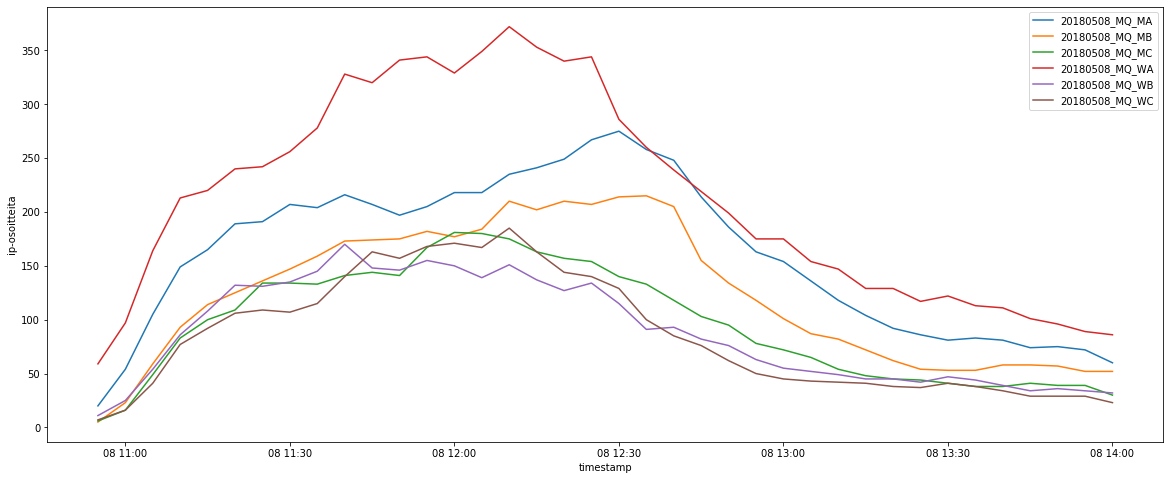

In [136]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip')

#parsitaan timestamp sarake haluttuun muotoon uuteen sarakkeeseen ja tehdään siitä samalla datetime muuttuja
df['timestamp2'] = pd.to_datetime(df['timestamp'].str.split(':').str.get(0) +' ' +df['timestamp'].str.split(':').str.get(1)+df['timestamp'].str.split(':').str.get(2)+df['timestamp'].str.split(':').str.get(3))

#luodaan uudesta sarakkeesta dataframen indeksi
df.set_index('timestamp2', inplace=True)

#kerätään alkuperäisen dataframen tiedon uuteen muuttujaan ja tehdään siitä uusi dataframe, koska muuten se olisi series
df1 = pd.DataFrame(df.groupby('eventid').resample('5min')['ip'].nunique())

#nollataan indeksi
df1.reset_index(inplace=True)

#df1 dataframesta tehdään omat versiot halutuille tiedoille
df2 = df1.loc[(df1['eventid']=='20180508_MQ_MA')]
#muokataan indeksi timestamp2 verison mukaan, jotta kaikissa on lopulta samat päivät
df2.set_index('timestamp2', inplace=True)

df3 = df1.loc[(df1['eventid']=='20180508_MQ_MB')]
df3.set_index('timestamp2', inplace=True)

df4 = df1.loc[(df1['eventid']=='20180508_MQ_MC')]
df4.set_index('timestamp2', inplace=True)

df5 = df1.loc[(df1['eventid']=='20180508_MQ_WA')]
df5.set_index('timestamp2', inplace=True)

df6 = df1.loc[(df1['eventid']=='20180508_MQ_WB')]
df6.set_index('timestamp2', inplace=True)

df7 = df1.loc[(df1['eventid']=='20180508_MQ_WC')]
df7.set_index('timestamp2', inplace=True)

#luodaan kaaviot halutuista dataframeistä
plt.figure()
plt.plot(df2['ip'], label='20180508_MQ_MA')
plt.plot(df3['ip'], label='20180508_MQ_MB')
plt.plot(df4['ip'], label='20180508_MQ_MC')
plt.plot(df5['ip'], label='20180508_MQ_WA')
plt.plot(df6['ip'], label='20180508_MQ_WB')
plt.plot(df7['ip'], label='20180508_MQ_WC')

fig = plt.gcf()
fig.set_size_inches(20,8) #muokataan kaavion kokoa
plt.xlabel('timestamp')
plt.ylabel('ip-osoitteita')
plt.legend()
plt.show()
